### Data Analytics Assignment - 3
### Clustering

### Team Members:
R Mukesh (CED15I002), Kiran Robert (EVD15I007), Gajaraj G. (MPD15I011)

### Read and preprocess the dataset of features extracted from DNA sequences

In [4]:
# read data from file
import pandas
dataset = pandas.read_excel('../datasets/features.xlsx')

# preprocess the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False)
data = scaler.fit_transform(dataset)

### Perform dimensionality reduction using PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
data = pca.fit_transform(data)

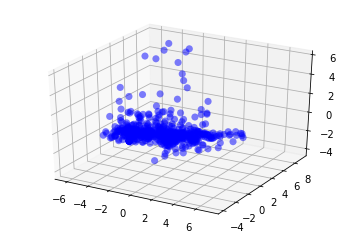

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

def visualise_3D(x_values,y_values,z_values,labels=None):
    """Visualise clusters of selected 3 features -- plotly"""
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')

    plot_kwds = {'alpha' : 0.5, 's' : 50, 'linewidths':0}

    if labels is None:
        ax.scatter(x_values,y_values,z_values,c='b',**plot_kwds)

    else:
        pallete=sns.color_palette('dark',np.unique(labels).max()+1)
        colors=[pallete[x] if x>=0 else (0.0,0.0,0.0) for x in labels]
        ax.scatter(x_values,y_values,z_values,c=colors,**plot_kwds)

    plt.show()
    
# visualize the data in 3D
visualise_3D(data[:,0], data[:,1], data[:,2])

### Perform DBSCAN clustering on the data and visualize

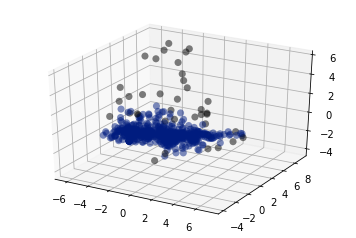

In [8]:
%matplotlib inline

from sklearn.cluster import DBSCAN

clusterer = DBSCAN(eps=1, min_samples=5)
clusterer.fit(data)

cluster_labels = clusterer.labels_

# visualize the data in 3D
visualise_3D(data[:,0], data[:,1], data[:,2], cluster_labels)

### Perform K-Means clustering on the data and visualize

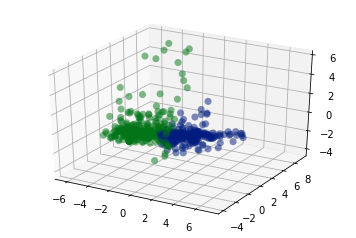

For K=2, Silhouette Score=0.344970457639728


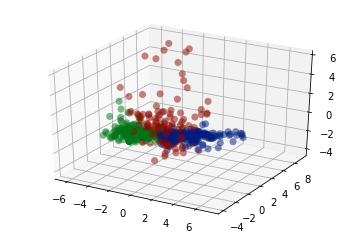

For K=3, Silhouette Score=0.36797086033026666


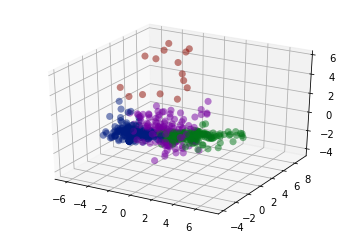

For K=4, Silhouette Score=0.37687851389312615


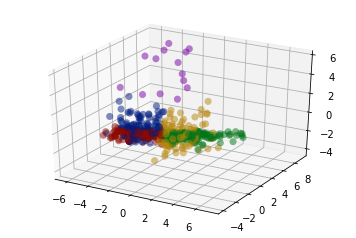

For K=5, Silhouette Score=0.3596002826383065


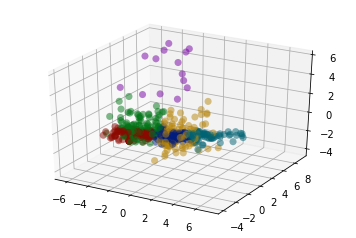

For K=6, Silhouette Score=0.35080433262121613


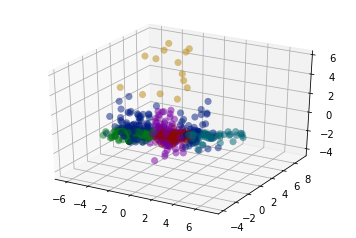

For K=7, Silhouette Score=0.3507506435403148


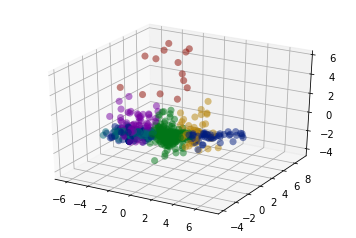

For K=8, Silhouette Score=0.3303759397114931


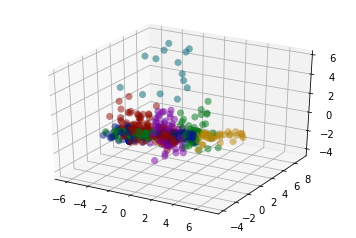

For K=9, Silhouette Score=0.31766787404887625


In [9]:
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for K in range(2, 10):
    clusterer = KMeans(n_clusters=K)
    clusterer.fit(data)
    cluster_labels = clusterer.labels_
    
    # visualize the data in 3D
    visualise_3D(data[:,0], data[:,1], data[:,2], cluster_labels)
    
    score = silhouette_score(data, cluster_labels)
    print("For K={}, Silhouette Score={}".format(K, score))

### Perform spectral clustering on the data and visualize

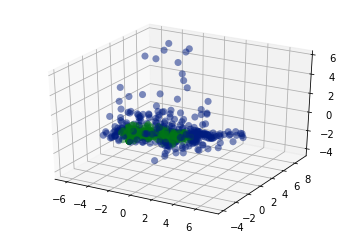

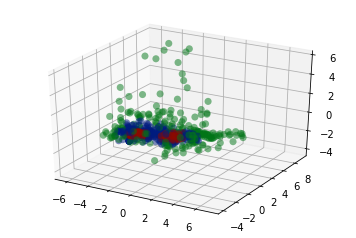

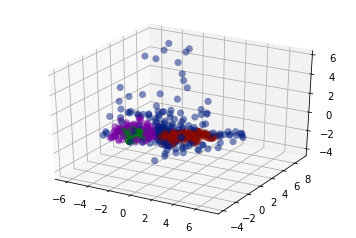

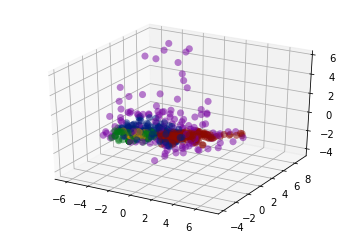

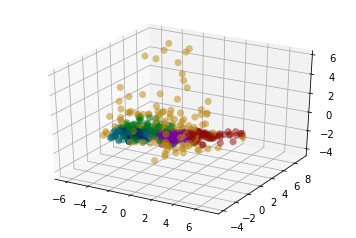

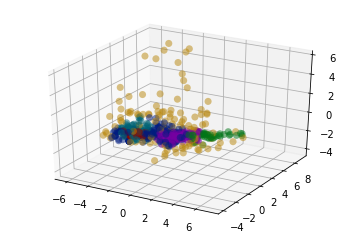

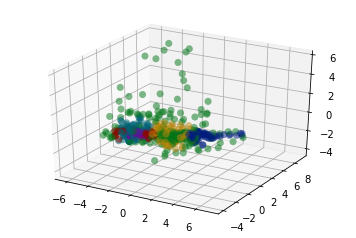

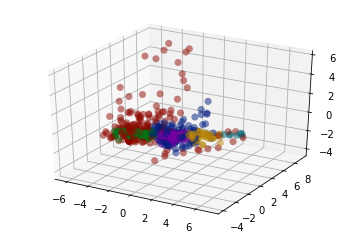

In [10]:
%matplotlib inline
from sklearn.cluster import SpectralClustering

for K in range(2, 10):
    clusterer = SpectralClustering(n_clusters=K)
    clusterer.fit(data)
    cluster_labels = clusterer.labels_
    
    # visualize the data in 3D
    visualise_3D(data[:,0], data[:,1], data[:,2], cluster_labels)